# Cleaning Modes With Rational Filters

In [2]:
%matplotlib inline

In [3]:
import matplotlib.pyplot as pl
import numpy as np
import matplotlib
mplparams = {
    'text.usetex': True,
    'axes.linewidth': 1,
    'axes.grid': False,
    'axes.labelweight': 'normal',
    'font.family': 'DejaVu Sans',
    'font.size': 26,
    'figure.figsize': (10,8)
}
matplotlib.rcParams.update(mplparams)

In [4]:
red = '#D60606'
blue = '#0083DE'
green = '#00BA75'
yellow = '#FFC61E'
purple = '#A433B3'
orange = '#FD882E'

In [5]:
modes = "220+221:220"

6.353797567210358


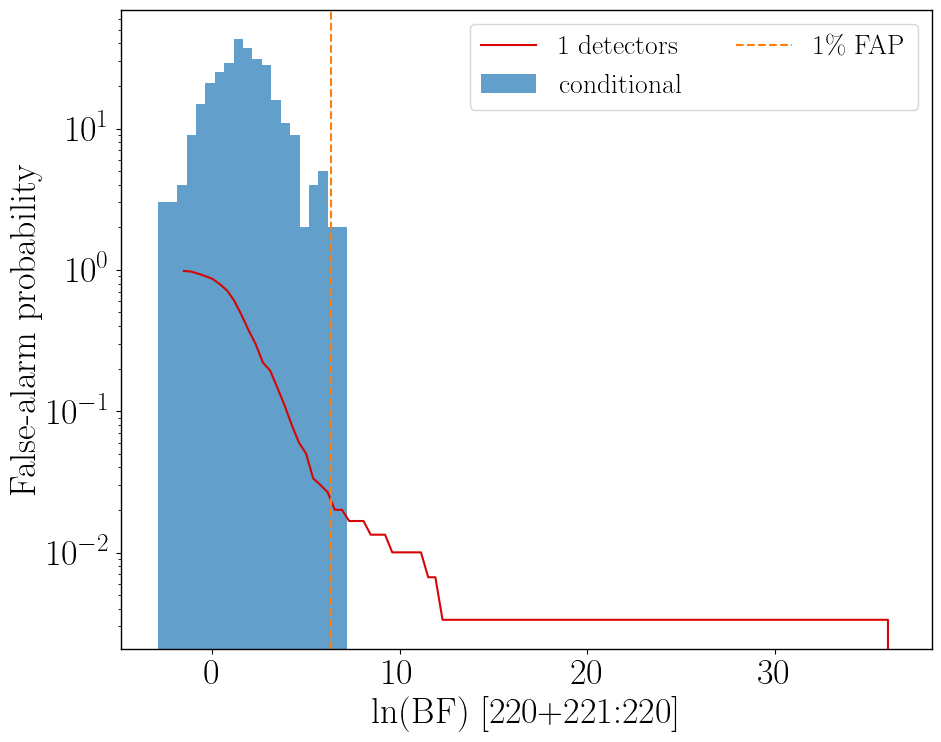

In [6]:
[SNRtot_MF, evidence_filt, evidence_inj, nofilter, \
 mass_in_solar, chi_inject, time] = np.loadtxt("results/agnostic_duration=16_srate=4096_GW150914_overfiltered_220+221:220_ALL.dat").T
log_BF = evidence_filt - evidence_inj
BF_space = np.linspace(-1.5, max(log_BF), 100)
FAP = [np.count_nonzero(log_BF>i)/len(log_BF) for i in BF_space]
pl.semilogy(BF_space, FAP, label='1 detectors', c=red)


[SNRtot_MF, evidence_filt, evidence_inj, nofilter, \
 mass_in_solar, chi_inject, time] = np.loadtxt("results/posteriorSampling_duration=16_srate=4096_GW150914_overfiltered_220+221:220_ALL.dat").T
BF = evidence_filt - evidence_inj

thresh = np.quantile(BF, 0.99)
pl.hist(BF, bins=20, label='conditional', alpha=0.7);
pl.axvline(thresh, c='tab:orange', ls='--', label=r'1\% FAP')
print(thresh)

pl.legend(ncol=2, loc='upper right', prop={'size': 20})
pl.xlabel("ln(BF) [220+221:220]")
pl.ylabel("False-alarm probability")
pl.tight_layout()
pl.savefig("plots/GW150914_background.pdf")

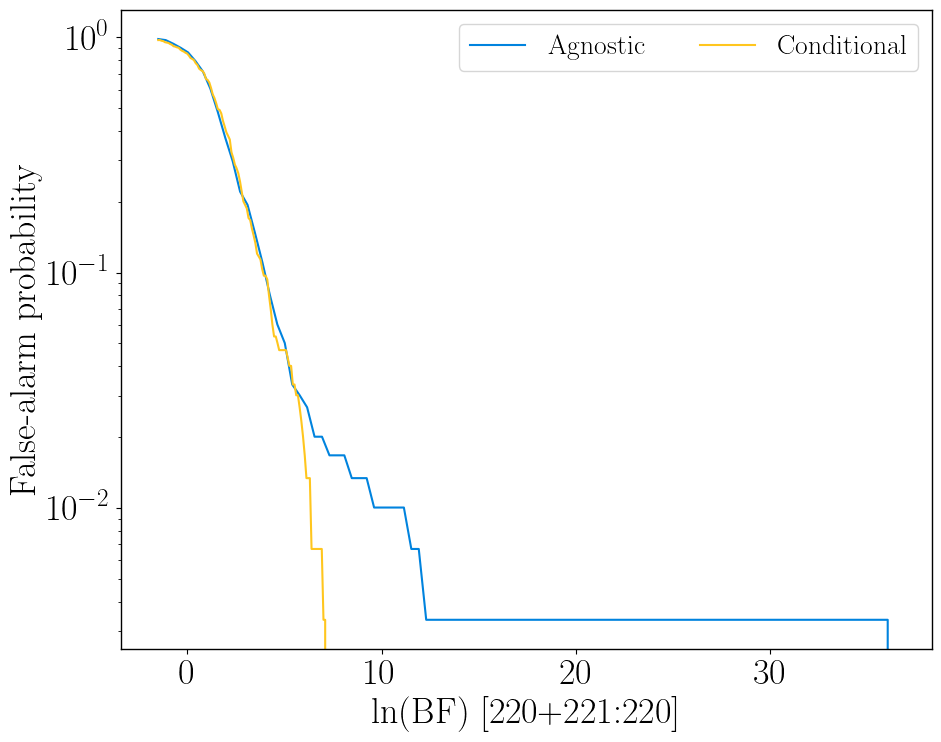

In [8]:
[SNRtot_MF, evidence_filt, evidence_inj, nofilter, \
 mass_in_solar, chi_inject, time] = np.loadtxt("results/agnostic_duration=16_srate=4096_GW150914_overfiltered_220+221:220_ALL.dat").T
log_BF = evidence_filt - evidence_inj
BF_space = np.linspace(-1.5, max(log_BF), 100)
FAP = [np.count_nonzero(log_BF>i)/len(log_BF) for i in BF_space]
pl.semilogy(BF_space, FAP, label='Agnostic', c=blue)

[SNRtot_MF, evidence_filt, evidence_inj, nofilter, \
 mass_in_solar, chi_inject, time] = np.loadtxt("results/posteriorSampling_duration=16_srate=4096_GW150914_overfiltered_220+221:220_ALL.dat").T
log_BF = evidence_filt - evidence_inj
BF_space = np.linspace(-1.5, max(log_BF), 100)
FAP = [np.count_nonzero(log_BF>i)/len(log_BF) for i in BF_space]
pl.semilogy(BF_space, FAP, label='Conditional', c=yellow)

pl.legend(ncol=2, loc='upper right', prop={'size': 20})
pl.xlabel("ln(BF) [220+221:220]")
pl.ylabel("False-alarm probability")
pl.tight_layout()
pl.savefig("plots/GW150914_background.pdf")

4.56172763408012


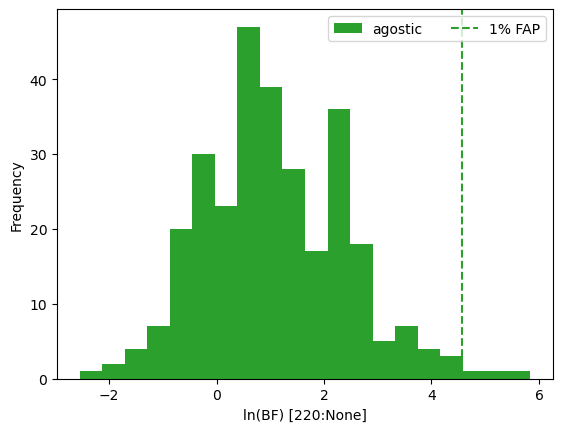

In [14]:
[SNRtot_MF, evidence_filt, evidence_inj, \
 mass_in_solar, chi_inject, time] = np.loadtxt("results/agnostic_duration=16_srate=4096_GW150914_overfiltered_220:None_ALL.dat").T
BF = evidence_filt - evidence_inj
thresh = np.quantile(BF, 0.99)
pl.hist(BF, color='tab:green', bins=20, label='agostic');
pl.axvline(thresh, c='tab:green', ls='--', label='1% FAP')
print(thresh)


pl.legend(ncol=2, loc='upper right')
pl.xlabel("ln(BF) [220:None]")
pl.ylabel("Frequency")
# pl.title("GW150914 background for "+modes+"\ndifferent injection types")
pl.savefig("GW150914_background_220:None.pdf")

In [29]:
[SNRtot_MF, evidence_filt, evidence_inj, nofilter, \
 mass_in_solar, chi_inject, time] = np.loadtxt("results/posteriorSampling_duration=16_srate=4096_GW150914_overfiltered_220+221:220_ALL.dat").T
BF = evidence_filt - evidence_inj
outlier = np.argmax(BF)
BF[outlier]

7.178463002294279

8.429201066712945
6.353797567210359


Text(0.5, 1.0, 'GW150914 background for 220+221:220\ndifferent injection types')

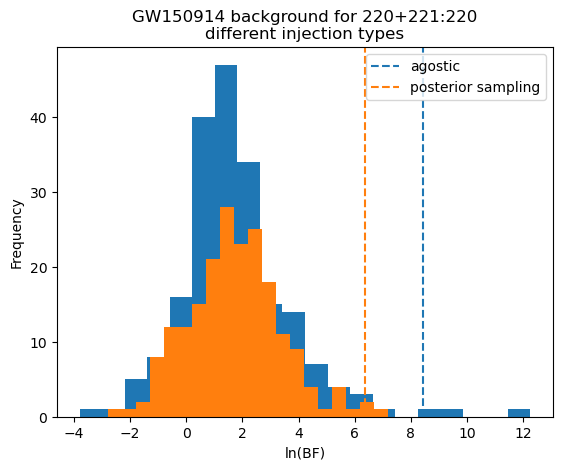

In [24]:
[SNRtot_MF, evidence_filt, evidence_inj, nofilter, \
 mass_in_solar, chi_inject, time] = np.loadtxt("results/agnostic_duration=16_srate=4096_GW150914_overfiltered_220+221:220_ALL.dat")[50:-50].T
BF = evidence_filt - evidence_inj
thresh = np.quantile(BF, 0.99)
pl.hist(BF, bins=20);
pl.axvline(thresh, c='tab:blue', ls='--', label='agostic')
print(thresh)

[SNRtot_MF, evidence_filt, evidence_inj, nofilter, \
 mass_in_solar, chi_inject, time] = np.loadtxt("results/posteriorSampling_duration=16_srate=4096_GW150914_overfiltered_220+221:220_ALL.dat")[50:-50].T
BF = evidence_filt - evidence_inj
thresh = np.quantile(BF, 0.99)
pl.hist(BF, bins=20);
pl.axvline(thresh, c='tab:orange', ls='--', label='posterior sampling')
print(thresh)

pl.legend()
pl.xlabel("ln(BF)")
pl.ylabel("Frequency")
pl.title("GW150914 background for "+modes+"\ndifferent injection types")

## Checking for correlations and outliers

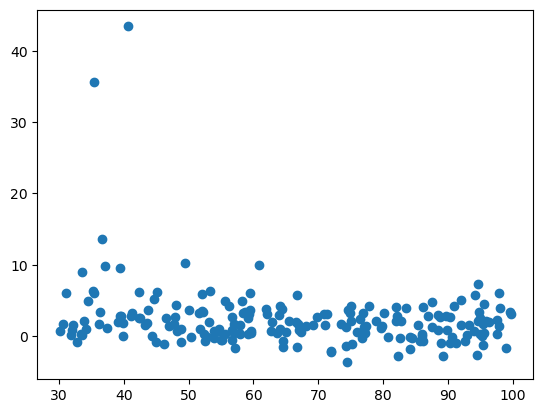

In [32]:
pl.plot(mass_in_solar, BF, 'o')

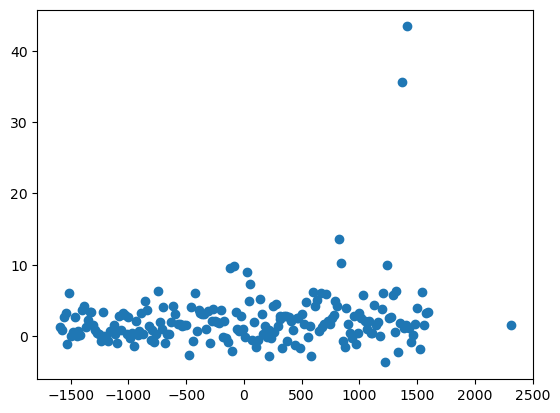

In [33]:
pl.plot(time, BF, 'o')

In [19]:
duration = 16
N = 200
pos = np.arange(-N//4 * duration, 0, duration) - 0.5
neg = np.arange(0, 3*N//4 * duration, duration) + 0.5
start_arr = np.append(pos, neg)
pos = np.arange((-N//4+1) * duration, 1, duration) - 0.5
neg = np.arange(duration, (3*N//4+1) * duration, duration) + 0.5
end_arr = np.append(pos, neg)